* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: the multilayer perceptron </h1>

<pre align="left"> June 07th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goal:
- Implement your Multilayer perceptron model

## Installing and importing Pytorch

In [4]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor


# Versions of torch and torchvision have to be compatible.
# check here: https://github.com/pytorch/pytorch/wiki/PyTorch-Versions

In [5]:
import torchvision

In [6]:
print(torch.__version__)
print(torchvision.__version__)

2.2.0
0.17.0


### Loading and preparing the MNIST dataset

In [7]:
# Define training and testing data using the functions in the cell above. 

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%
4.0%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%
100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Question 1

### Visualize some elements of the dataset:

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


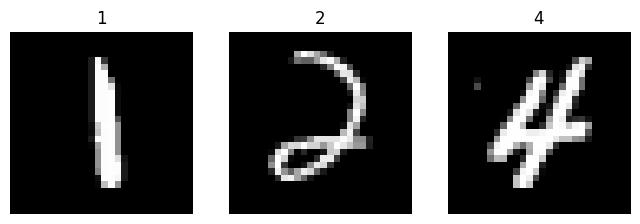

In [14]:
import matplotlib.pyplot as plt
# Visualize some images of the MNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [26]:
train_data.targets[0].item()

5

## Question 2

### Define a dataloader to construct a batch-wise iterator from your train/test data


In [30]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, BATCH_SIZE, shuffle=True, num_workers=2)
testloader = DataLoader(test_data, BATCH_SIZE, shuffle=False, num_workers=2)

## Question 3

### Design your own Neural Network

In [31]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)


    # This is implementing the activation fn relu from x to y_pred
    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

## Question 4

### Train your neural network on the trainloader

In [32]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 2
learning_rate = 1e-6
# it's a popular algo, gradient descent for nn
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()

        losses.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.3010761737823486
0 2000 2.2771522998809814
0 4000 2.247927665710449
0 6000 2.17225980758667
0 8000 2.1047520637512207
0 10000 2.1221508979797363
0 12000 1.952239990234375
0 14000 1.9139888286590576
1 0 1.955619215965271
1 2000 1.8699469566345215
1 4000 2.0176591873168945
1 6000 1.6572014093399048
1 8000 1.6108999252319336
1 10000 1.5814313888549805
1 12000 0.8994532823562622
1 14000 1.4864155054092407


## Question 5

### Inspect the optimization procedure through the loss (plot the loss), what do you observe?

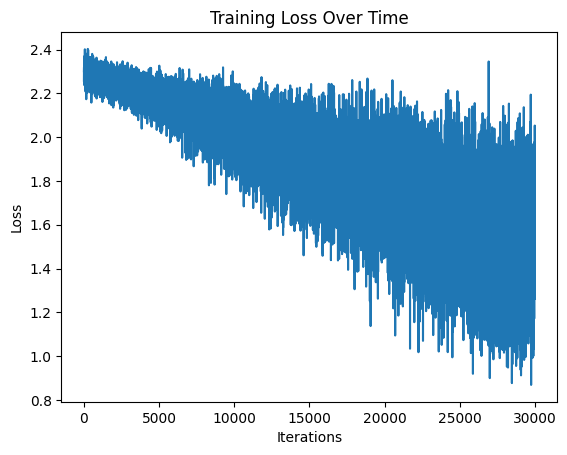

In [33]:
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

The graph visualizes the training loss over time. The loss gradually decreases over the 2 epochs, which shows that the model is learning well. The variance is big because of a small batch size.

## Question 6

### Evaluate the quality of your classifier on the test set

In [35]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.7989)


Accuracy: 79.89%

## Question 7 (Bonus)

### Repeat this training with different loss (nll/cross_entropy...) and different number of epochs. What do you observe?

1) Trying out the same with 8 epochs instead of 2.

In [43]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 8
learning_rate = 1e-6
# it's a popular algo, gradient descent for nn
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()

        losses.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.3212757110595703
0 2000 2.3663249015808105
0 4000 2.2449610233306885
0 6000 2.266658306121826
0 8000 2.1521124839782715
0 10000 1.9780579805374146
0 12000 2.2875661849975586
0 14000 2.000002384185791
1 0 1.9128305912017822
1 2000 2.040815591812134
1 4000 1.8223497867584229
1 6000 1.5387853384017944
1 8000 1.7170469760894775
1 10000 1.5072243213653564
1 12000 1.9177080392837524
1 14000 1.1841347217559814
2 0 1.6986987590789795
2 2000 1.167643666267395
2 4000 1.3501343727111816
2 6000 1.1700923442840576
2 8000 1.1569124460220337
2 10000 1.0921776294708252
2 12000 1.220152497291565
2 14000 0.8926056623458862
3 0 1.0070669651031494
3 2000 1.0918116569519043
3 4000 0.973334789276123
3 6000 0.9669528007507324
3 8000 1.2708148956298828
3 10000 1.1038907766342163
3 12000 0.8988065719604492
3 14000 0.8374214172363281


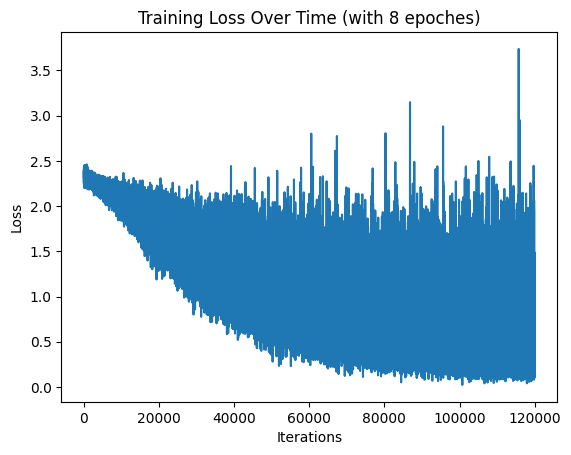

In [44]:
plt.plot(losses)
plt.title('Training Loss Over Time (with 8 epoches)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [45]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.8749)


Observation:
With 8 epochs in consideration, the graph descends and becomes very densely flat towards the end, which probably indicates gradual convergence compared to when we just had 2 epochs.

However, after considering more epochs, there's an increase in accuracy (by 10% approx.).

2) Trying out nll_loss instead of cross_entropy, I have to softmax it separately here since it's not included in the loss function.

In [46]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 2
learning_rate = 1e-6
# it's a popular algo, gradient descent for nn
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = nn.NLLLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(F.log_softmax(outputs, dim=1), labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()

        losses.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.3228917121887207
0 2000 2.2555174827575684
0 4000 2.172224283218384
0 6000 2.1507151126861572
0 8000 2.160895347595215
0 10000 2.032681941986084
0 12000 1.9338939189910889
0 14000 1.8003383874893188
1 0 1.9562649726867676
1 2000 1.977921724319458
1 4000 1.6360936164855957
1 6000 1.5711302757263184
1 8000 1.8288006782531738
1 10000 1.3380441665649414
1 12000 1.0845186710357666
1 14000 1.110642433166504


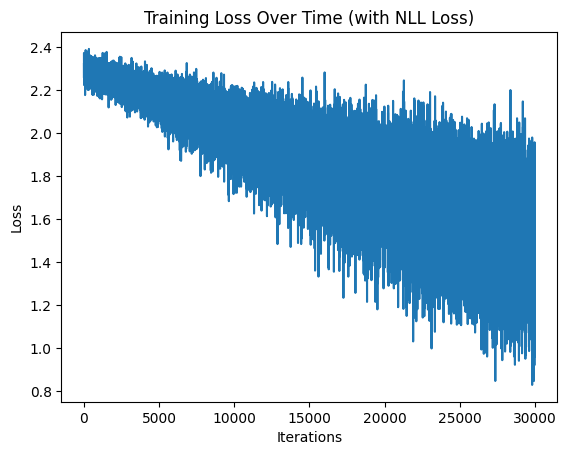

In [47]:
plt.plot(losses)
plt.title('Training Loss Over Time (with NLL Loss)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [48]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.7882)


Observation: This graph steeps down very rapidly in comparison. However, there is no major difference in the accuracy when compared to the first model (about 1% difference). 

3) NLL Loss with no Soft Maxing

In [52]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 2
learning_rate = 1e-6
# it's a popular algo, gradient descent for nn
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = nn.NLLLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()

        losses.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 0.04340941458940506
0 2000 -0.17101016640663147
0 4000 -0.24826225638389587
0 6000 -0.4605608880519867
0 8000 -0.5566942691802979
0 10000 -0.8049256801605225
0 12000 -1.1936957836151123
0 14000 -1.796215534210205
1 0 -1.774362325668335
1 2000 -1.857283592224121
1 4000 -2.692103624343872
1 6000 -3.0672621726989746
1 8000 -3.5203070640563965
1 10000 -3.47078275680542
1 12000 -3.807504653930664
1 14000 -3.8605899810791016


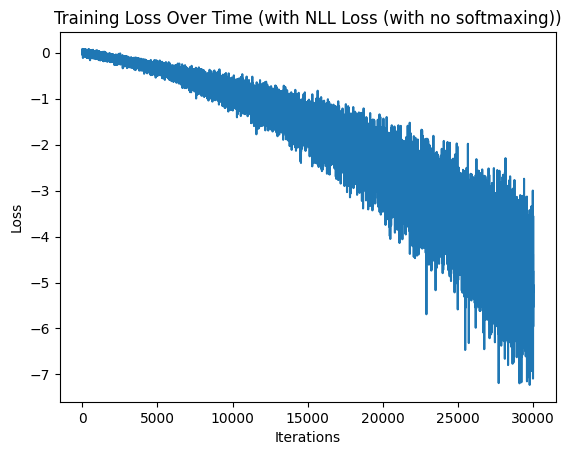

In [53]:
plt.plot(losses)
plt.title('Training Loss Over Time (with NLL Loss (with no softmaxing))')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [54]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.4320)


Observation: When I perform nll loss without softmaxing separately, the accuracy is reduced by 50%, because of incorrect calculations and this shows that softmaxing is an essential step to compute the gradients correctly.